# Mushroom

## Introduction
Mushrooms are used for a wide variety of purposes, from medicine to food. This wide variety of purposes lead both scientists and amateurs to "hunt" them in the wild. This hunting can be challenging, especially for amateurs, since it is hard to identify eatable mushrooms. 

This wide variety of mushrooms also rise a lot of great questions such as "What are the key characteristics of poisons mushrooms ?". This notebook aims to explore those amazing creatures and provide insights. 

## Dataset
The dataset used in this notebook was taken from [Keaggle](https://www.kaggle.com/uciml/mushroom-classification). In this dataset, we have a wide variety of mushroom samples with their 23 characteristics.

---


This is the final project for the course [Python for data analysis I](https://cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=python-para-analise-de-dados-i&nInst=cce), given by PUC-RIO.

By [J. P. Maia](https://github.com/Maia-jp)

## Loading Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Projetos/Pyhon para a analise da dados - projeto Final/mushrooms.xlsx")
df.head()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,stalk.root,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
0,BELL,SCALY,BUFF,BRUISES,NONE,FREE,CLOSE,BROAD,WHITE,ENLARGING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,TWO,PENDANT,GREEN,SEVERAL,GRASSES,POISONOUS
1,CONVEX,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,EQUAL,FIBROUS,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
2,FLAT,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,EQUAL,FIBROUS,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
3,CONVEX,FIBROUS,BROWN,NO,NONE,FREE,CLOSE,NARROW,BLACK,ENLARGING,EQUAL,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SOLITARY,URBAN,EDIBLE
4,FLAT,FIBROUS,BROWN,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,PINK,WHITE,ONE,PENDANT,BROWN,SOLITARY,WOODS,EDIBLE


In [ ]:
df.describe()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,stalk.root,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
count,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936
unique,6,4,8,2,7,2,2,2,9,2,4,4,4,7,7,2,3,4,6,6,6,2
top,CONVEX,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
freq,2980,2300,1952,3184,3056,5912,4632,5208,1448,3136,3800,3876,3684,3416,3344,5928,5768,3488,2048,2184,2504,3768


In [ ]:
'''''
Since all of our atributes are categorial the best way to handle Nan values is by dropping them. 
'''''
print("Complete dataset: {}".format(df.size))
df = df.dropna(axis=0,how ='any')
print("After dropping Nan values dataset: {}".format(df.size)) 

Complete dataset: 130592
After dropping Nan values dataset: 130592


## Data Analysis

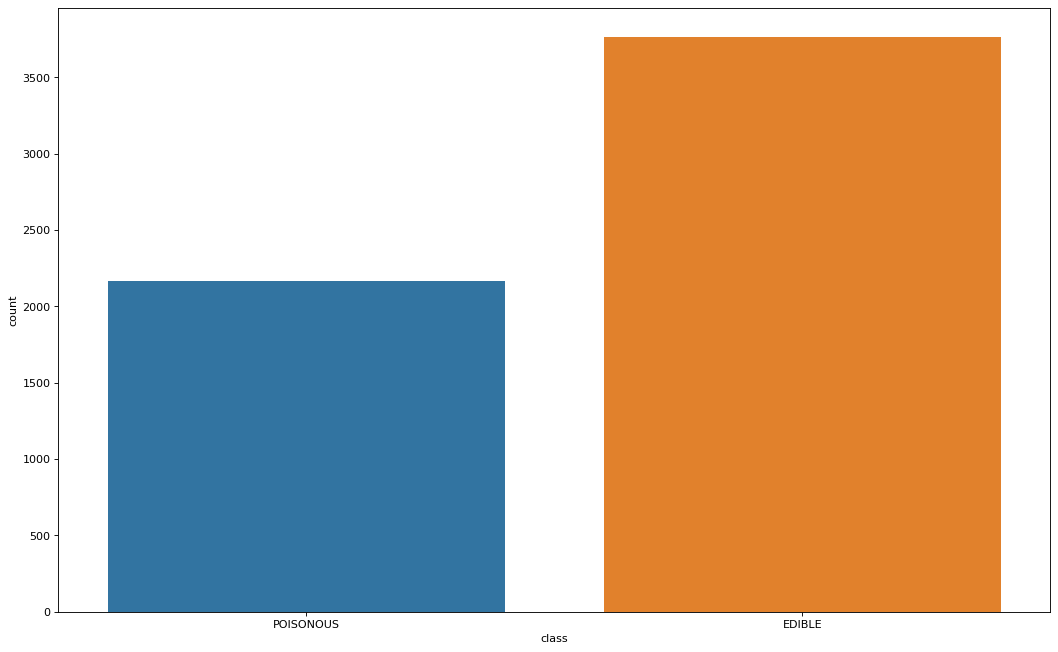

In [ ]:
'''''
First, we are going to find de number of tuples of each class.
The number of samples of mushroom's edible class is somewhat higher than the poisonous one.
'''''
plt.figure(figsize=(16,10), dpi= 80)
sns.countplot(x="class", data=df);

In [ ]:
'''''
This dataset is composed only of categorial data. A good way to overcome the "lack of numbers" and find insights is by creating a function where
given the attribute/column, the number of edible or poisonous for each unique attribute is returned as a new data frame
'''''

def count_attribute(attribute_name="cap.shape"): # cap.shape is the default value, only to avoid errors.
  num_edible = []
  num_poison = []
  attributes = df[attribute_name].unique()

  for att in attributes:
    num_edible.append(len(df.loc[(df["class"] == "EDIBLE") & (df[attribute_name] == att)]))
    num_poison.append(len(df.loc[(df["class"] == "POISONOUS") & (df[attribute_name] == att)]))
    
  
  return pd.DataFrame({'attribute':attributes,'EDIBLE':num_edible,'POISONOUS':num_poison})



### Atribute selection
Since this dataset has a lot of attributes to analyze one by one, a couple of them are going to be chosen using the following criteria: "An amateur would be able to identify"

In this criteria there are the folliwing attributes:
1. cap shape
2. cap color
3. bruises
4. odor
5. population
6. habitat

### Cap Shape

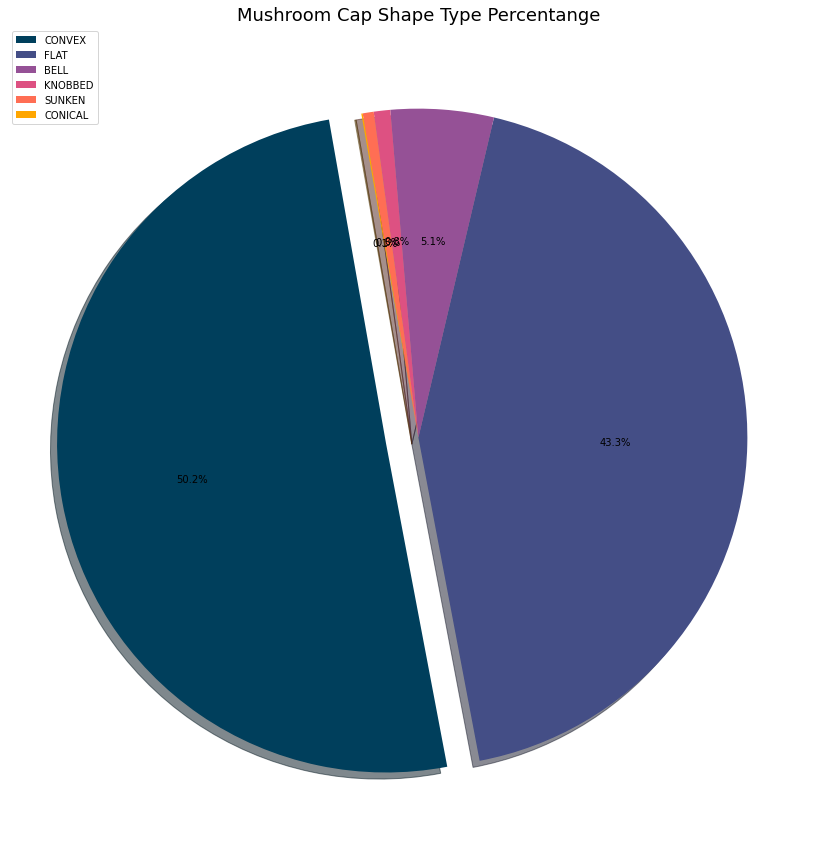

In [ ]:
#Data - pie chart
cap_shape = df["cap.shape"].value_counts()
cap_shape_labels = df["cap.shape"].keys()


#Plot
plt.figure(figsize=(15,12))
plt.pie(cap_shape, explode=(0.1, 0, 0, 0, 0, 0),
        autopct='%1.1f%%', shadow=True, startangle=100,colors=["#003f5c","#444e86","#955196",
                                                               "#dd5182","#ff6e54","#ffa600"])


plt.title('Mushroom Cap Shape Type Percentange', fontsize=18)
plt.legend(cap_shape.keys())
plt.tight_layout()
plt.show()

In [ ]:
cap_shape

CONVEX     2980
FLAT       2572
BELL        300
KNOBBED      48
SUNKEN       32
CONICAL       4
Name: cap.shape, dtype: int64

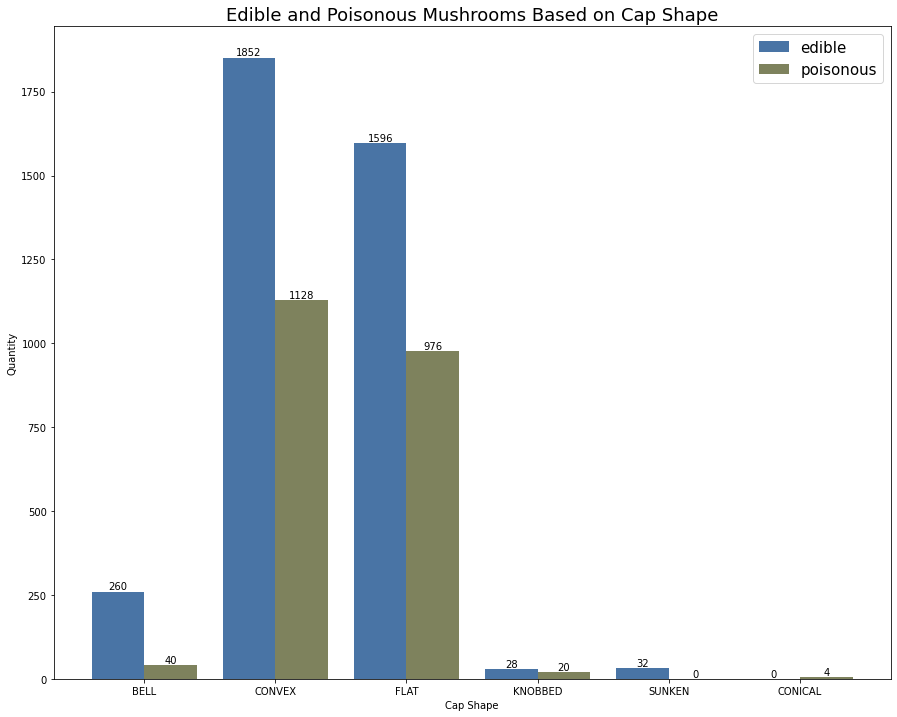

In [ ]:
cap_shape_class = count_attribute()

#Plot
width = 0.40
ind = np.arange(len(cap_shape_class["attribute"]))

fig, ax = plt.subplots(figsize=(15,12))

edible_bars = ax.bar(ind,cap_shape_class["EDIBLE"], width, color='#4974a5')
poison_bars = ax.bar(ind+width,cap_shape_class["POISONOUS"], width, color='#7E825D')

#Text
ax.set_xlabel("Cap Shape",fontsize=10)
ax.set_ylabel('Quantity',fontsize=10)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Shape',fontsize=18)

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(cap_shape_class["attribute"])

for bar in edible_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

for bar in poison_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)
plt.show()

In [ ]:
cap_shape_class

,attribute,EDIBLE,POISONOUS
0,BELL,260,40
1,CONVEX,1852,1128
2,FLAT,1596,976
3,KNOBBED,28,20
4,SUNKEN,32,0
5,CONICAL,0,4


### Cap Color

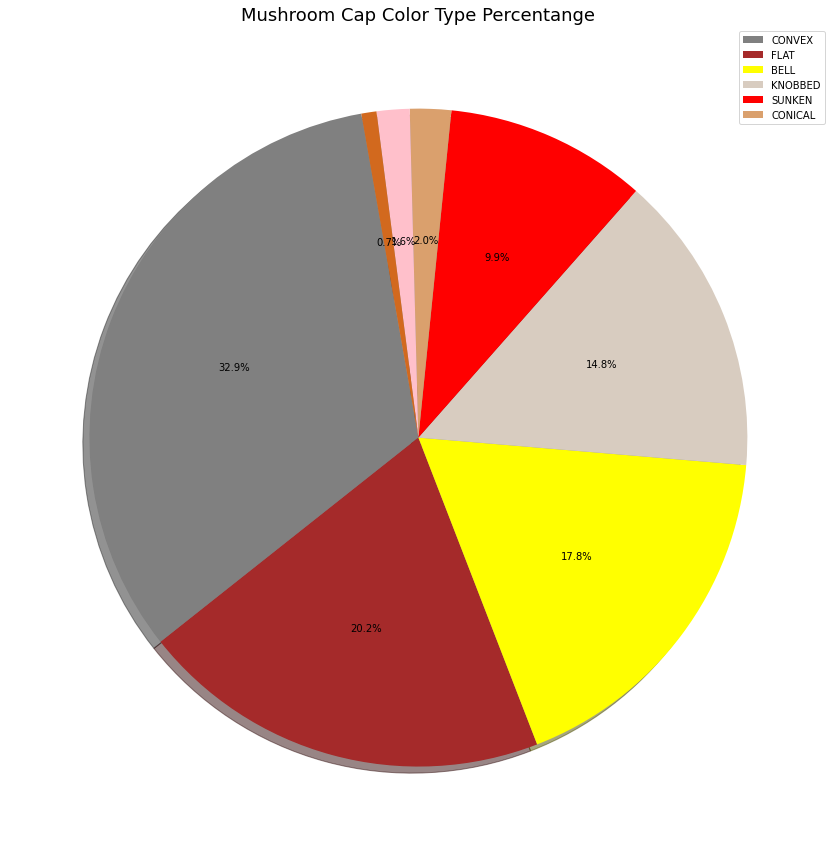

In [ ]:
#Data - pie chart
cap_color = df["cap.color"].value_counts()
cap_color_labels = df["cap.color"].keys()

colors = ['GRAY', 'BROWN', 'YELLOW', '#d8ccc0', 'RED', '#DAA06D', 'PINK', '#d2691e']
explode = np.zeros(len(cap_color))

#Plot
plt.figure(figsize=(15,12))
plt.pie(cap_color, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=100,colors=colors)


plt.title('Mushroom Cap Color Type Percentange', fontsize=18)
plt.legend(cap_shape.keys())
plt.tight_layout()
plt.show()

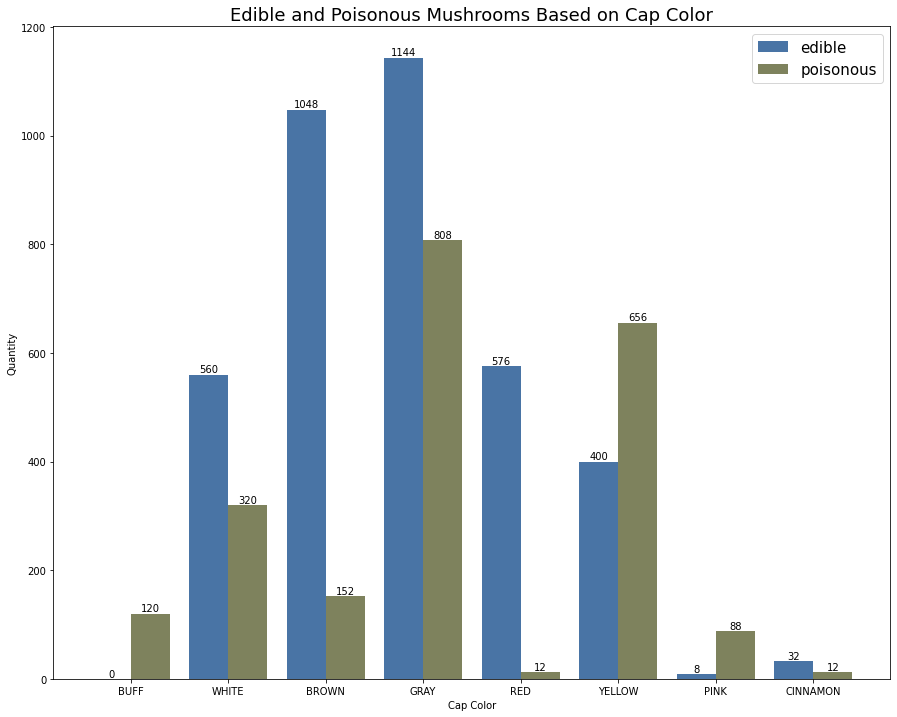

In [ ]:
cap_color_class = count_attribute("cap.color")

#Plot
width = 0.40
ind = np.arange(len(cap_color_class["attribute"]))

fig, ax = plt.subplots(figsize=(15,12))

edible_bars = ax.bar(ind,cap_color_class["EDIBLE"], width, color='#4974a5')
poison_bars = ax.bar(ind+width,cap_color_class["POISONOUS"], width, color='#7E825D')

#Text
ax.set_xlabel("Cap Color",fontsize=10)
ax.set_ylabel('Quantity',fontsize=10)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=18)

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(cap_color_class["attribute"])

for bar in edible_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

for bar in poison_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)
plt.show()


In [ ]:
cap_color_class

,attribute,EDIBLE,POISONOUS
0,BUFF,0,120
1,WHITE,560,320
2,BROWN,1048,152
3,GRAY,1144,808
4,RED,576,12
5,YELLOW,400,656
6,PINK,8,88
7,CINNAMON,32,12


### Bruises


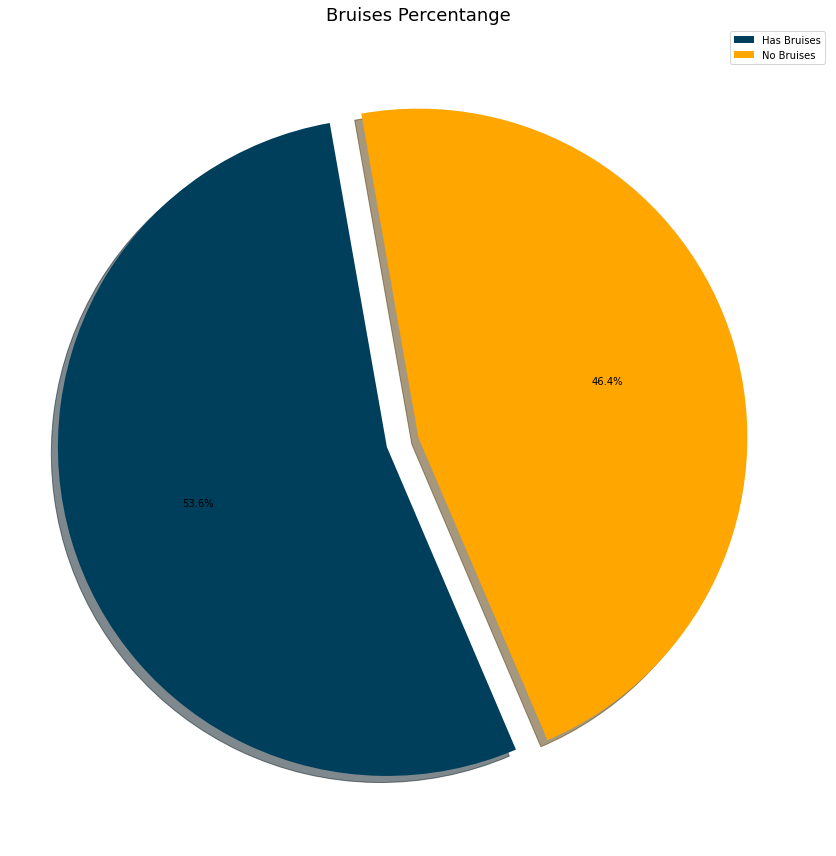

In [ ]:
#Data - pie chart
bruises = df["bruises"].value_counts()

#Plot
plt.figure(figsize=(15,12))
plt.pie(bruises, explode=(0.1, 0),
        autopct='%1.1f%%', shadow=True, startangle=100,colors=["#003f5c","#ffa600"])


plt.title('Bruises Percentange', fontsize=18)
plt.legend(["Has Bruises","No Bruises"], fontsize=10)
plt.tight_layout()
plt.show()

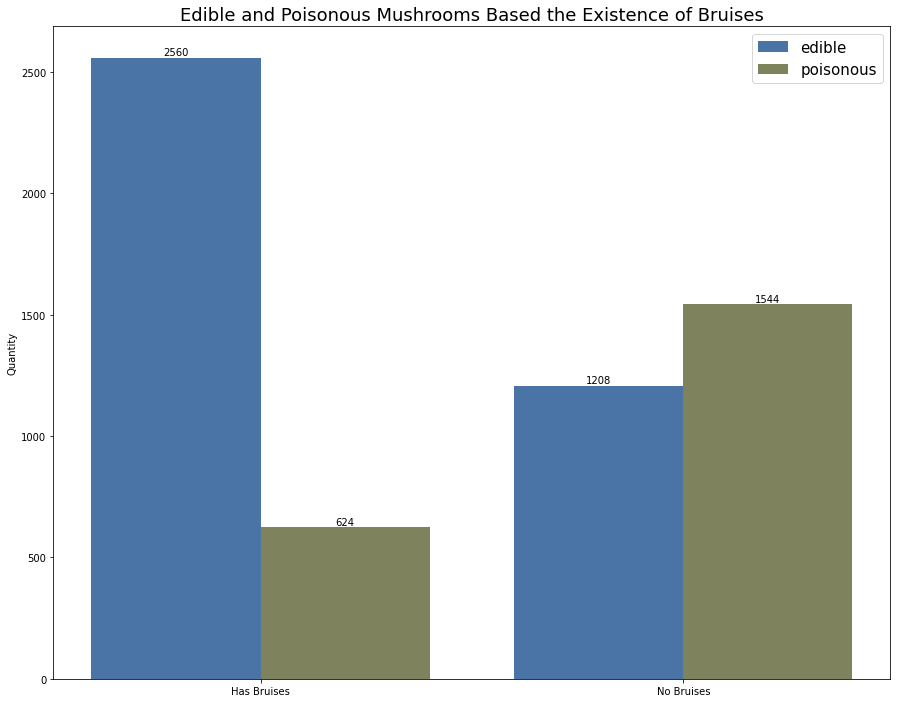

In [ ]:
bruises_class = count_attribute("bruises")

#Plot
width = 0.40
ind = np.arange(len(bruises_class["attribute"]))

fig, ax = plt.subplots(figsize=(15,12))

edible_bars = ax.bar(ind,bruises_class["EDIBLE"], width, color='#4974a5')
poison_bars = ax.bar(ind+width,bruises_class["POISONOUS"], width, color='#7E825D')

#Text
ax.set_ylabel('Quantity',fontsize=10)
ax.set_title('Edible and Poisonous Mushrooms Based the Existence of Bruises',fontsize=18)

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(["Has Bruises","No Bruises"])

for bar in edible_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

for bar in poison_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)
plt.show()

### Odor


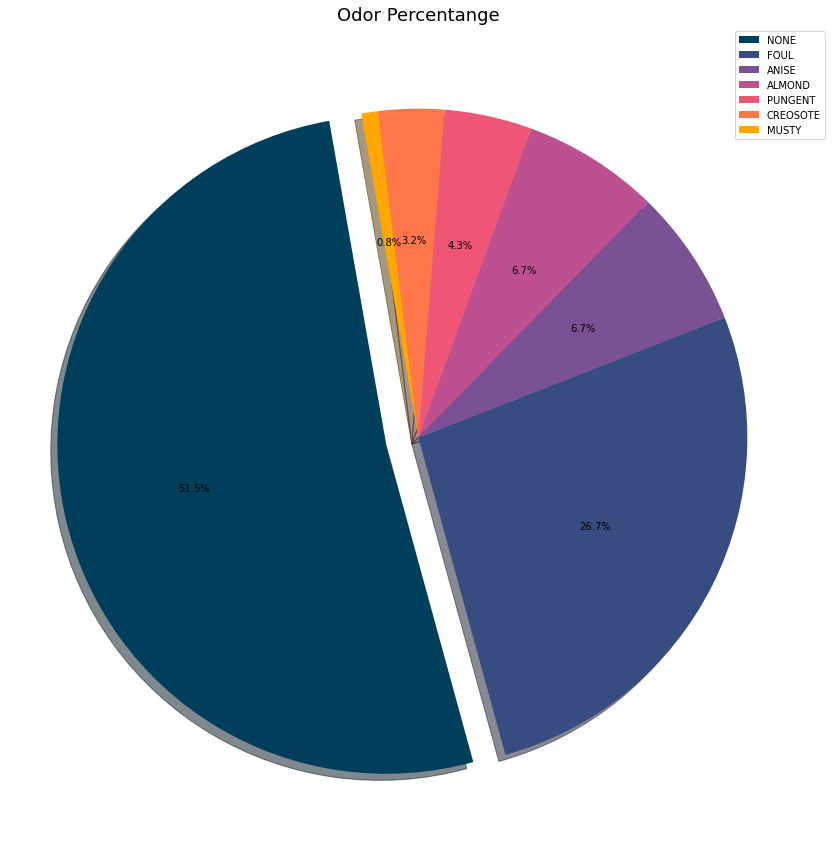

In [ ]:
#Data - pie chart
odor = df["odor"].value_counts()

#Plot
plt.figure(figsize=(15,12))
explode = np.zeros(len(odor))
explode[0] = 0.1
plt.pie(odor, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=100,colors=["#003f5c","#374c80","#7a5195"
        ,"#bc5090","#ef5675","#ff764a"
        ,"#ffa600"])


plt.title('Odor Percentange', fontsize=18)
plt.legend(odor.index, fontsize=10)
plt.tight_layout()
plt.show()

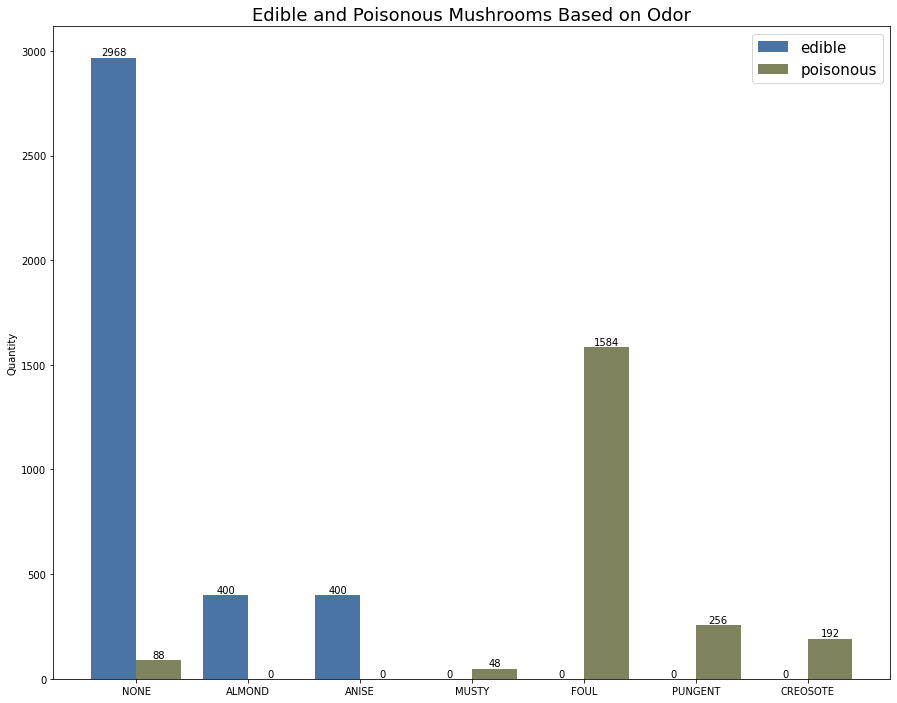

In [ ]:
odor_class = count_attribute("odor")

#Plot
width = 0.40
ind = np.arange(len(odor_class["attribute"]))

fig, ax = plt.subplots(figsize=(15,12))

edible_bars = ax.bar(ind,odor_class["EDIBLE"], width, color='#4974a5')
poison_bars = ax.bar(ind+width,odor_class["POISONOUS"], width, color='#7E825D')

#Text
ax.set_ylabel('Quantity',fontsize=10)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=18)

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(odor_class["attribute"])

for bar in edible_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

for bar in poison_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)
plt.show()

### Population

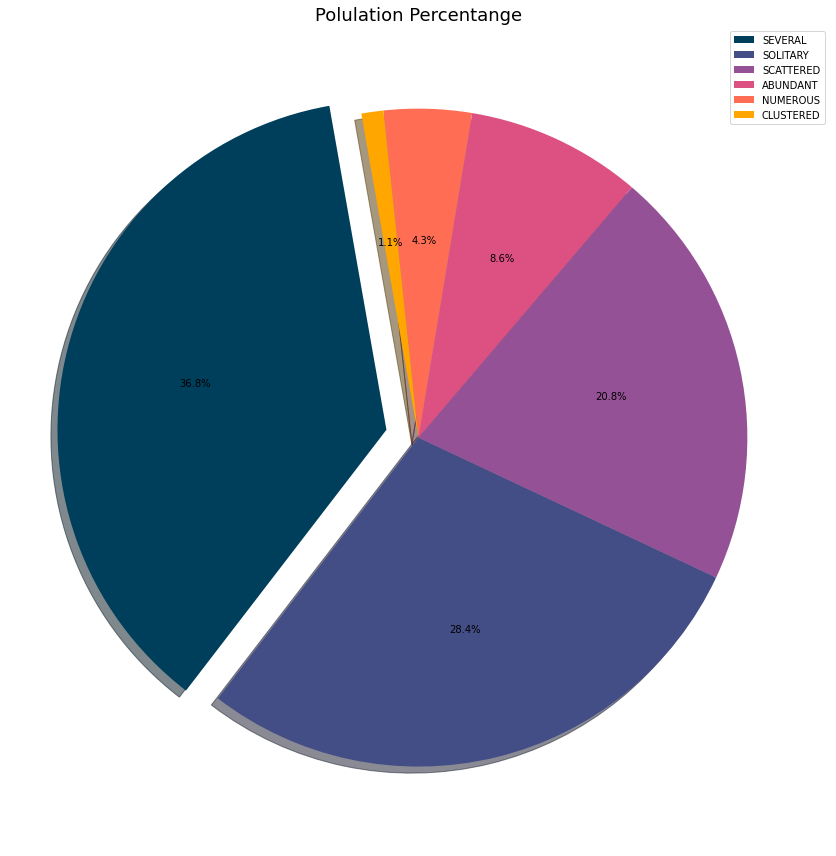

In [ ]:
#Data - pie chart
population = df["population"].value_counts()

#Plot
plt.figure(figsize=(15,12))
explode = np.zeros(len(population))
explode[0] = 0.1
plt.pie(population, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=100,colors=["#003f5c","#444e86","#955196",
                                                               "#dd5182","#ff6e54","#ffa600"])


plt.title('Polulation Percentange', fontsize=18)
plt.legend(population.index, fontsize=10)
plt.tight_layout()
plt.show()

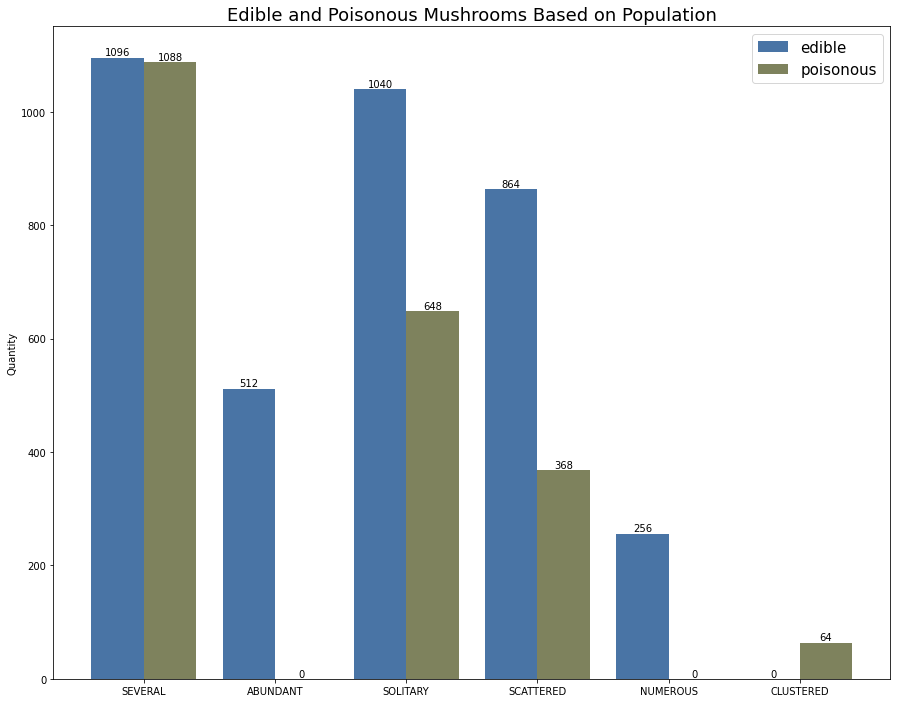

In [ ]:
population_class = count_attribute("population")

#Plot
width = 0.40
ind = np.arange(len(population_class["attribute"]))

fig, ax = plt.subplots(figsize=(15,12))

edible_bars = ax.bar(ind,population_class["EDIBLE"], width, color='#4974a5')
poison_bars = ax.bar(ind+width,population_class["POISONOUS"], width, color='#7E825D')

#Text
ax.set_ylabel('Quantity',fontsize=10)
ax.set_title('Edible and Poisonous Mushrooms Based on Population',fontsize=18)

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(population_class["attribute"])

for bar in edible_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

for bar in poison_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)
plt.show()

### Habitat

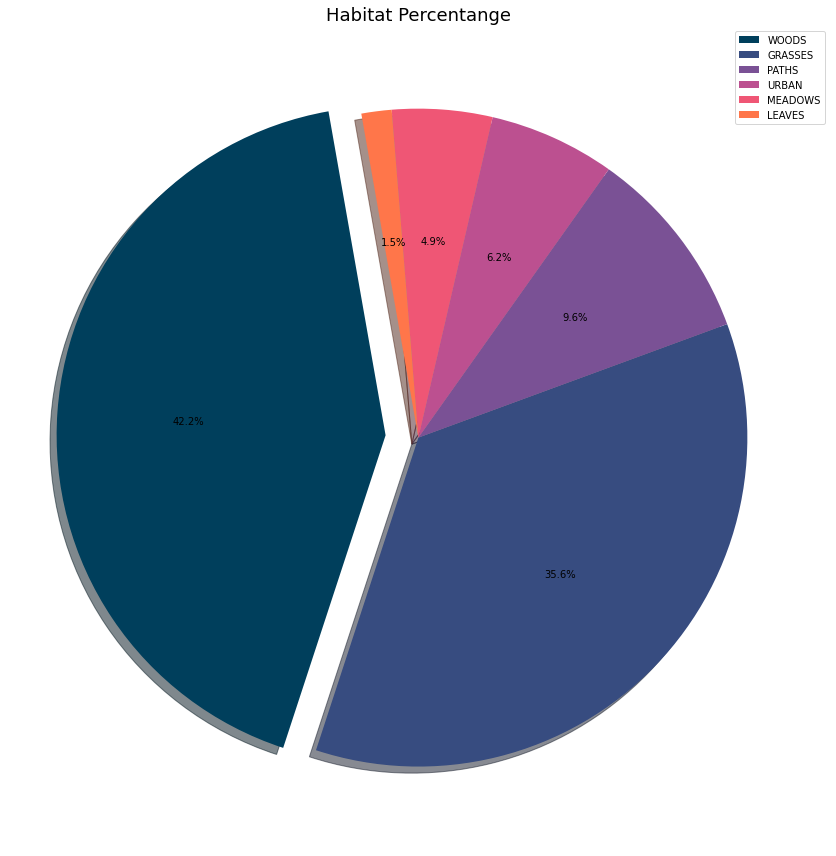

In [ ]:
#Data - pie chart
odor = df["habitat."].value_counts()

#Plot
plt.figure(figsize=(15,12))
explode = np.zeros(len(odor))
explode[0] = 0.1
plt.pie(odor, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=100,colors=["#003f5c","#374c80","#7a5195"
        ,"#bc5090","#ef5675","#ff764a"
        ,"#ffa600"])


plt.title('Habitat Percentange', fontsize=18)
plt.legend(odor.index, fontsize=10)
plt.tight_layout()
plt.show()

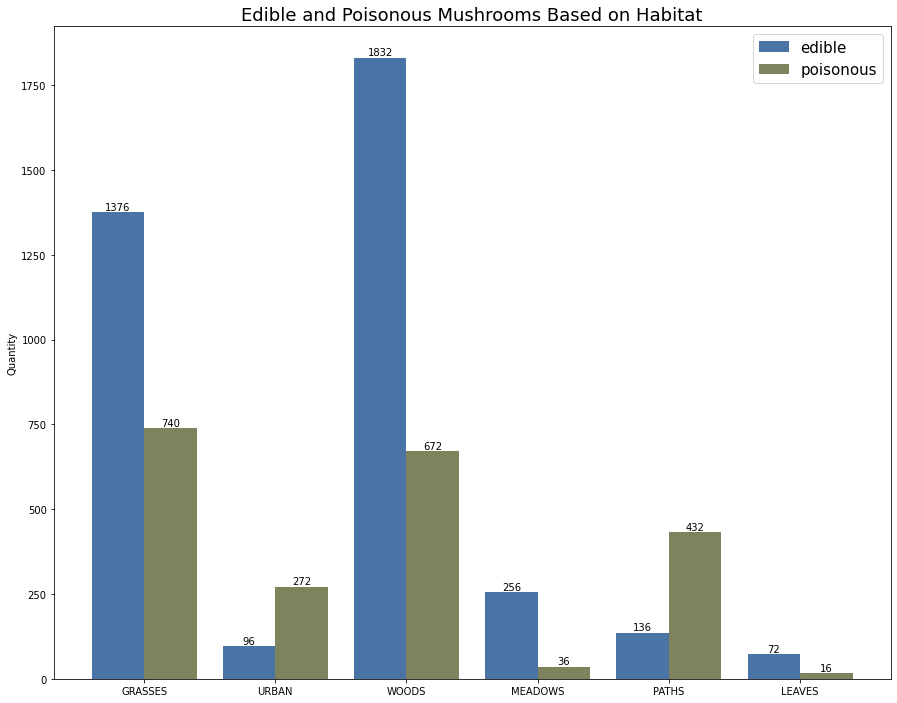

In [ ]:
habitat_class = count_attribute("habitat.")

#Plot
width = 0.40
ind = np.arange(len(habitat_class["attribute"]))

fig, ax = plt.subplots(figsize=(15,12))

edible_bars = ax.bar(ind,habitat_class["EDIBLE"], width, color='#4974a5')
poison_bars = ax.bar(ind+width,habitat_class["POISONOUS"], width, color='#7E825D')

#Text
ax.set_ylabel('Quantity',fontsize=10)
ax.set_title('Edible and Poisonous Mushrooms Based on Habitat',fontsize=18)

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(habitat_class["attribute"])

for bar in edible_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

for bar in poison_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=10)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)
plt.show()



---




### Overall Analysis

Overall, we reached some very interesting results. 

First of all, not all mushroom characteristics are deterministic in order to classify their consumption. Bruises and habitat practically do not matter in the classification. Other classifications can be very dangerous, take the difference between "Numerous" and "Cluesterd" mushrooms for instance. These differences are not easy to notice, however, it is a matter of life and death.

The greatest surprise came from the "Odor"
 category. This is the only category where the results are very clear and distinct. A good noose can save someone from dying for sure.


---



## Machine Learning
To train our model we are going to use a "Random Forest". This model seems to fit a lot in a dataset of this kind. We are going to train using 3 different parameters bases on our data analysis.

First, the training is going to include all data available.

Second, only the data I categorized as "easy to identify" are going to be used.

Last, odor and color only since both of them showed to be pretty important as well as easy to identify.

### Pre-Trainning

In [ ]:
# Seed
seed = 11100001 
random.seed(seed)
np.random.seed(seed)

In [ ]:
from sklearn.preprocessing import LabelEncoder

dummy_class = df["class"]

df = df.loc[:,df.columns != 'class'].apply(LabelEncoder().fit_transform)
df["class"] = dummy_class
# main Model = all data
mainDF = df

# amateur Model = 'Amateur' data
amateurDF = df[["cap.shape","cap.color","bruises",
                  "odor","population","habitat.","class"]]
# odorColor Model = 'Odor' & 'Color' data
odorColorDF = df[["odor","cap.color","class"]]

#Unique data from each model (used in preddiction phase)
uniqueData = {'mainModel':mainDF[5000:],'amateurModel':amateurDF[5000:],'odorColorModel':odorColorDF[5000:]}


### Trainning

In [ ]:
from sklearn.model_selection import train_test_split

def createTrainData(df):
  X=df.loc[:,df.columns != 'class']
  y=df['class']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
  return {"X_train":X_train,"X_test":X_test,"y_train":y_train,"y_test":y_test}

main_TrainData = createTrainData(mainDF[:5000])
amateur_TrainData = createTrainData(amateurDF[:5000])
odorColor_TrainData = createTrainData(odorColorDF[:5000])


In [ ]:
# Radom Florest
from sklearn.ensemble import RandomForestClassifier
main_Model = RandomForestClassifier()
amateur_Model = RandomForestClassifier()
odorColor_Model = RandomForestClassifier()

main_Model.fit(main_TrainData["X_train"], main_TrainData["y_train"]);
amateur_Model.fit(amateur_TrainData["X_train"], amateur_TrainData["y_train"]);
odorColor_Model.fit(odorColor_TrainData["X_train"], odorColor_TrainData["y_train"]);

In [ ]:
def evalf(model,data,name=False):
  if name:
    print("")
    print("----{}----".format(name))

  acc = model.score(data["X_train"], data["y_train"])*100
  print('Trainning acc: ', acc, '%')
  
  acc = model.score(data["X_test"], data["y_test"])*100
  print('Test acc: ', acc, '%')
  return

evalf(main_Model,main_TrainData,"Main Model")
evalf(amateur_Model,amateur_TrainData,"Amateur Model")
evalf(odorColor_Model,odorColor_TrainData,"Odor Color Model")


----Main Model----
Trainning acc:  100.0 %
Test acc:  100.0 %

----Amateur Model----
Trainning acc:  100.0 %
Test acc:  100.0 %

----Odor Color Model----
Trainning acc:  99.325 %
Test acc:  99.1 %


In [ ]:
def evalf_full(model,data,name=False):
  if name:
    print("")
    print("----{}----".format(name))

    y_test = data["y_test"]
    X_test = data["X_test"]

    y_pred = model.predict(X_test)

    # acc
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    print('Acc: ', accuracy)

    # Kappa
    from sklearn.metrics import cohen_kappa_score
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Kappa: ', kappa)

    # F1
    from sklearn.metrics import f1_score
    f1 = f1_score(y_test, y_pred, average='macro')
    print('F1: ', f1)
  return


evalf_full(main_Model,main_TrainData,"Main Model")
evalf_full(amateur_Model,amateur_TrainData,"Amateur Model")
evalf_full(odorColor_Model,odorColor_TrainData,"Odor Color Model")


----Main Model----
Acc:  1.0
Kappa:  1.0
F1:  1.0

----Amateur Model----
Acc:  1.0
Kappa:  1.0
F1:  1.0

----Odor Color Model----
Acc:  0.991
Kappa:  0.9803601511831918
F1:  0.9901798077206352


### Prediction

In [ ]:
#Main model
from sklearn.metrics import accuracy_score
df_infer = uniqueData['mainModel'].loc[:,uniqueData['mainModel'].columns != 'class']

predictions = main_Model.predict(df_infer)

print(predictions[0:5])
uniqueData['mainModel']["class"][0:5].to_list()

['EDIBLE' 'EDIBLE' 'POISONOUS' 'EDIBLE' 'EDIBLE']


['EDIBLE', 'EDIBLE', 'POISONOUS', 'EDIBLE', 'EDIBLE']

In [ ]:
#Main model
from sklearn.metrics import accuracy_score
df_infer = uniqueData['amateurModel'].loc[:,uniqueData['amateurModel'].columns != 'class']

predictions = amateur_Model.predict(df_infer2)

print(predictions[0:5])
uniqueData['amateurModel']["class"][0:5].to_list()

['EDIBLE' 'EDIBLE' 'POISONOUS' 'EDIBLE' 'EDIBLE']


['EDIBLE', 'EDIBLE', 'POISONOUS', 'EDIBLE', 'EDIBLE']

In [ ]:
#Main model
from sklearn.metrics import accuracy_score
df_infer = uniqueData['odorColorModel'].loc[:,uniqueData['odorColorModel'].columns != 'class']

predictions = odorColor_Model.predict(df_infer)

print(predictions[0:5])
uniqueData['odorColorModel']["class"][0:5].to_list()

['EDIBLE' 'EDIBLE' 'POISONOUS' 'EDIBLE' 'EDIBLE']


['EDIBLE', 'EDIBLE', 'POISONOUS', 'EDIBLE', 'EDIBLE']

### Conclusion

On the whole, I believe that outstanding results were achieved. All three models had more than 99% of accuracy in both the training and test phases. Some of them had a 100% score! 

It is very interesting to see how a machine learning model can unfold a complicated classification problem with outstanding quality. Specially because some models have just a few attributes available.

The "Odor Color" model showed special, since, with only two attributes the score reached almost 100%. 